<a href="https://colab.research.google.com/github/SilentGee03/Anal-tica-de-Datos-y-Herramientas-de-Inteligencia-Artificial-II/blob/main/Valores%20At%C3%ADpicos%202/Seattle_ValoresAtipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Carga desde un archivo .csv desde equipo
dataSeattle = pd.read_csv('Seattle_sin_nulos.csv')
dataSeattle.head()

,Unnamed: 0,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,...,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_clean,bathroom_text_num,amenities_num,host_verifications_num,priceMex,priceMexCategory
0,0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,...,15.0,0,80,2,bath,3,29,2,1941.39,Muy Económico
1,1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,...,15.0,2,24,2,shared bath,5,53,2,1490.36,Muy Económico
2,2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,...,15.0,0,18,2,bath,3,63,2,3706.29,Muy Económico
3,3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,...,15.0,0,18,2,bath,3,57,2,2451.25,Muy Económico
4,4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,...,15.0,0,80,2,bath,3,28,2,3274.87,Muy Económico


In [6]:
dataSeattle = dataSeattle.drop('Unnamed: 0', axis=1)

In [7]:
# Verificamos información
dataSeattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    6442 non-null   object 
 1   source                          6442 non-null   object 
 2   host_name                       6442 non-null   object 
 3   host_response_time              6442 non-null   object 
 4   host_verifications              6442 non-null   object 
 5   neighbourhood_cleansed          6442 non-null   object 
 6   property_type                   6442 non-null   object 
 7   room_type                       6442 non-null   object 
 8   bathrooms_text                  6442 non-null   object 
 9   amenities                       6442 non-null   object 
 10  calendar_last_scraped           6442 non-null   object 
 11  host_id                         6442 non-null   int64  
 12  host_since                      64

In [8]:
# Creamos 2 DataFrames para poder procesar los outliers
cuantitativas = dataSeattle.select_dtypes(include = [int, np.float64])
cualitativas = dataSeattle.select_dtypes(include = [object])

<Figure size 1500x800 with 0 Axes>

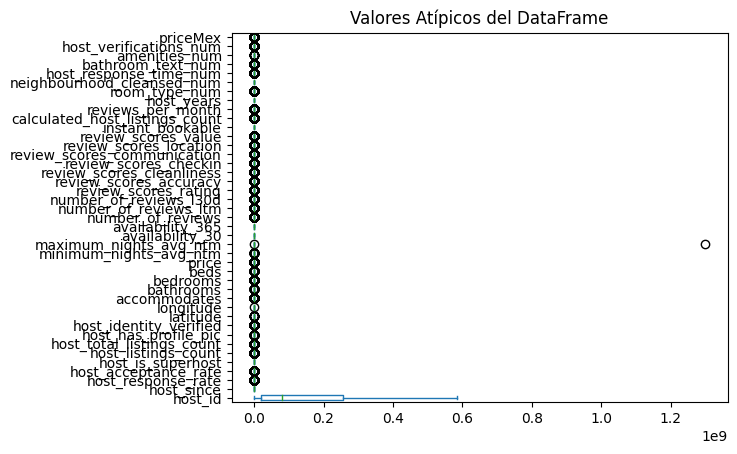

In [9]:
# Realizamos diagrama de caja o bigote de cada columna del DataFrame
fig = plt.figure(figsize = (15,8))
cuantitativas.plot(kind = 'box', vert = False)
plt.title('Valores Atípicos del DataFrame')
plt.show() # Dibujamos el diagrama

**PROCEDIMIENTO DESVIACIÓN ESTÁNDAR**

In [10]:
# Encuentra los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print('Límite superior permitido', Limite_Superior)
print('Límite inferior permitido', Limite_Inferior)

Límite superior permitido host_id                           6.753066e+08
host_since                        2.026736e+03
host_response_rate                1.307778e+02
host_acceptance_rate              1.423234e+02
host_is_superhost                 2.147169e+00
host_listings_count               3.430221e+03
host_total_listings_count         3.894704e+03
host_has_profile_pic              1.293976e+00
host_identity_verified            1.707917e+00
latitude                          4.777240e+01
longitude                        -1.222341e+02
accommodates                      1.200787e+01
bathrooms                         3.789838e+00
bedrooms                          5.238498e+00
beds                              6.713057e+00
price                             8.548370e+02
minimum_nights_avg_ntm            6.736919e+01
maximum_nights_avg_ntm            4.877565e+07
availability_30                   3.344992e+01
availability_365                  5.320793e+02
number_of_reviews                 

In [11]:
# Verificamos outliers
data2 = cuantitativas[(y>Limite_Superior) | (y<Limite_Inferior)]
data2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
6439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Verificamos outliers
data3 = cuantitativas[(y<=Limite_Superior) & (y>=Limite_Inferior)]
data3

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex
0,14942,2009,90.0,44.0,0.0,4.0,5.0,1.0,1.0,47.654440,...,2.0,0.88,15.0,0.0,80,2.0,3.0,29.0,2.0,1941.39
1,30559,2009,98.0,98.0,1.0,10.0,11.0,1.0,1.0,47.550170,...,10.0,1.16,15.0,2.0,24,2.0,NaN,53.0,2.0,1490.36
2,31481,2009,100.0,80.0,1.0,2.0,2.0,1.0,1.0,47.554950,...,2.0,0.64,15.0,0.0,18,2.0,3.0,63.0,2.0,3706.29
3,31481,2009,100.0,80.0,1.0,2.0,2.0,1.0,1.0,47.556270,...,2.0,0.51,15.0,0.0,18,2.0,3.0,57.0,2.0,2451.25
4,14942,2009,90.0,44.0,0.0,4.0,5.0,1.0,1.0,47.656080,...,2.0,0.61,15.0,0.0,80,2.0,3.0,28.0,2.0,3274.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,398317720,2021,100.0,99.0,1.0,130.0,134.0,1.0,1.0,47.676760,...,66.0,1.78,3.0,0.0,57,3.0,3.0,45.0,2.0,9432.41
6438,184675574,2018,100.0,99.0,0.0,4.0,5.0,1.0,1.0,47.665714,...,4.0,1.78,6.0,2.0,10,3.0,NaN,17.0,2.0,1608.02
6439,584875397,2024,97.6,92.3,0.0,1.0,1.0,NaN,1.0,47.531331,...,1.0,1.78,0.0,0.0,67,3.0,3.0,37.0,2.0,4353.42
6440,581629893,2024,72.0,100.0,0.0,6.0,18.0,1.0,1.0,47.509680,...,1.0,1.78,0.0,2.0,62,3.0,3.0,47.0,1.0,784.40


In [13]:
# Corroboramos valores nulos del DataFrame4
valores_nulos = data3.isnull().sum()
valores_nulos

,0
host_id,0
host_since,0
host_response_rate,98
host_acceptance_rate,175
host_is_superhost,0
host_listings_count,340
host_total_listings_count,359
host_has_profile_pic,67
host_identity_verified,471
latitude,0


In [14]:
# Reemplazamos valores atípicos (nulos) del DataFrame con 'mean'
# Realizamos una copia del DataFrame
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(),1))
data_clean

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex
0,14942,2009,90.0,44.0,0.0,4.0,5.0,1.0,1.0,47.654440,...,2.0,0.88,15.0,0.0,80,2.0,3.0,29.0,2.0,1941.39
1,30559,2009,98.0,98.0,1.0,10.0,11.0,1.0,1.0,47.550170,...,10.0,1.16,15.0,2.0,24,2.0,3.1,53.0,2.0,1490.36
2,31481,2009,100.0,80.0,1.0,2.0,2.0,1.0,1.0,47.554950,...,2.0,0.64,15.0,0.0,18,2.0,3.0,63.0,2.0,3706.29
3,31481,2009,100.0,80.0,1.0,2.0,2.0,1.0,1.0,47.556270,...,2.0,0.51,15.0,0.0,18,2.0,3.0,57.0,2.0,2451.25
4,14942,2009,90.0,44.0,0.0,4.0,5.0,1.0,1.0,47.656080,...,2.0,0.61,15.0,0.0,80,2.0,3.0,28.0,2.0,3274.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,398317720,2021,100.0,99.0,1.0,130.0,134.0,1.0,1.0,47.676760,...,66.0,1.78,3.0,0.0,57,3.0,3.0,45.0,2.0,9432.41
6438,184675574,2018,100.0,99.0,0.0,4.0,5.0,1.0,1.0,47.665714,...,4.0,1.78,6.0,2.0,10,3.0,3.1,17.0,2.0,1608.02
6439,584875397,2024,97.6,92.3,0.0,1.0,1.0,1.0,1.0,47.531331,...,1.0,1.78,0.0,0.0,67,3.0,3.0,37.0,2.0,4353.42
6440,581629893,2024,72.0,100.0,0.0,6.0,18.0,1.0,1.0,47.509680,...,1.0,1.78,0.0,2.0,62,3.0,3.0,47.0,1.0,784.40


In [15]:
# Unimos el DataFrame cuantitativo limpio con el DataFrame cualitativo

Datos_limpios_desvest = pd.concat([cualitativas, data_clean], axis = 1)
Datos_limpios_desvest

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,2.0,0.88,15.0,0.0,80,2.0,3.0,29.0,2.0,1941.39
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,10.0,1.16,15.0,2.0,24,2.0,3.1,53.0,2.0,1490.36
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,2.0,0.64,15.0,0.0,18,2.0,3.0,63.0,2.0,3706.29
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,2.0,0.51,15.0,0.0,18,2.0,3.0,57.0,2.0,2451.25
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,2.0,0.61,15.0,0.0,80,2.0,3.0,28.0,2.0,3274.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,25/06/2024,city scrape,Joanne,within an hour,"['email', 'phone']",Phinney Ridge,Entire home,Entire home/apt,4 baths,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,66.0,1.78,3.0,0.0,57,3.0,3.0,45.0,2.0,9432.41
6438,24/06/2024,city scrape,Anna,within an hour,"['email', 'phone']",Bryant,Private room in home,Private room,1 shared bath,"[""Washer"", ""Wifi"", ""Hangers"", ""Dryer"", ""Smoke ...",...,4.0,1.78,6.0,2.0,10,3.0,3.1,17.0,2.0,1608.02
6439,24/06/2024,city scrape,Aaron,within an hour,"['email', 'phone']",Roxhill,Entire home,Entire home/apt,1.5 baths,"[""Ping pong table"", ""Record player"", ""Smart lo...",...,1.0,1.78,0.0,0.0,67,3.0,3.0,37.0,2.0,4353.42
6440,24/06/2024,city scrape,Sudip,within an hour,['phone'],Rainier Beach,Private room in home,Private room,3 baths,"[""Rice maker"", ""Luggage dropoff allowed"", ""Ref...",...,1.0,1.78,0.0,2.0,62,3.0,3.0,47.0,1.0,784.40


In [16]:
# Convertir DataFrame a CSV
Datos_limpios_desvest.to_csv('Datos_Limpios_desv_Seattle.csv')

In [17]:
# Descargar archivo filtrado en CSV
from google.colab import files

files.download('Datos_Limpios_desv_Seattle.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Procedimiento CUANTILES para sustituir Outliers**

In [18]:
# Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Límite superior permitido', Limite_Superior_iqr)
print('Límite inferior permitido', Limite_Inferior_iqr)

Límite superior permitido host_id                           6.083727e+08
host_since                        2.026500e+03
host_response_rate                1.015000e+02
host_acceptance_rate              1.115500e+02
host_is_superhost                 2.500000e+00
host_listings_count               4.350000e+01
host_total_listings_count         6.700000e+01
host_has_profile_pic              1.000000e+00
host_identity_verified            1.000000e+00
latitude                          4.775696e+01
longitude                        -1.222414e+02
accommodates                      9.500000e+00
bathrooms                         3.500000e+00
bedrooms                          3.500000e+00
beds                              6.000000e+00
price                             4.300000e+02
minimum_nights_avg_ntm            7.200000e+01
maximum_nights_avg_ntm            2.265000e+03
availability_30                   3.000000e+01
availability_365                  6.160000e+02
number_of_reviews                 

In [19]:
# Obtenemos datos limpios del DataFrame
data3_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex
0,14942,2009,NaN,NaN,0.0,4.0,5.0,1.0,1.0,47.654440,...,2.0,0.88,15.0,0.0,80,NaN,3.0,29.0,2.0,1941.39
1,30559,2009,98.0,98.0,1.0,10.0,11.0,1.0,1.0,47.550170,...,10.0,1.16,15.0,NaN,24,NaN,NaN,53.0,2.0,1490.36
2,31481,2009,100.0,NaN,1.0,2.0,2.0,1.0,1.0,47.554950,...,2.0,0.64,15.0,0.0,18,NaN,3.0,63.0,2.0,3706.29
3,31481,2009,100.0,NaN,1.0,2.0,2.0,1.0,1.0,47.556270,...,2.0,0.51,15.0,0.0,18,NaN,3.0,57.0,2.0,2451.25
4,14942,2009,NaN,NaN,0.0,4.0,5.0,1.0,1.0,47.656080,...,2.0,0.61,15.0,0.0,80,NaN,3.0,28.0,2.0,3274.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,398317720,2021,100.0,99.0,1.0,NaN,NaN,1.0,1.0,47.676760,...,NaN,1.78,3.0,0.0,57,3.0,3.0,45.0,2.0,NaN
6438,184675574,2018,100.0,99.0,0.0,4.0,5.0,1.0,1.0,47.665714,...,4.0,1.78,6.0,NaN,10,3.0,NaN,17.0,2.0,1608.02
6439,584875397,2024,97.6,92.3,0.0,1.0,1.0,NaN,1.0,47.531331,...,1.0,1.78,0.0,0.0,67,3.0,3.0,37.0,2.0,4353.42
6440,581629893,2024,NaN,100.0,0.0,6.0,18.0,1.0,1.0,47.509680,...,1.0,1.78,0.0,NaN,62,3.0,3.0,47.0,NaN,784.40


In [20]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

,0
host_id,0
host_since,0
host_response_rate,693
host_acceptance_rate,706
host_is_superhost,0
host_listings_count,1156
host_total_listings_count,1159
host_has_profile_pic,67
host_identity_verified,471
latitude,18


In [21]:
# Reemplazamos valores atípicos (nulos) del dataframe con 'mean'
# Realizamos una copia del dataframe
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex
0,14942,2009,99.7,97.0,0.0,4.0,5.0,1.0,1.0,47.654440,...,2.0,0.88,15.0,0.0,80,3.0,3.0,29.0,2.0,1941.39
1,30559,2009,98.0,98.0,1.0,10.0,11.0,1.0,1.0,47.550170,...,10.0,1.16,15.0,0.0,24,3.0,3.0,53.0,2.0,1490.36
2,31481,2009,100.0,97.0,1.0,2.0,2.0,1.0,1.0,47.554950,...,2.0,0.64,15.0,0.0,18,3.0,3.0,63.0,2.0,3706.29
3,31481,2009,100.0,97.0,1.0,2.0,2.0,1.0,1.0,47.556270,...,2.0,0.51,15.0,0.0,18,3.0,3.0,57.0,2.0,2451.25
4,14942,2009,99.7,97.0,0.0,4.0,5.0,1.0,1.0,47.656080,...,2.0,0.61,15.0,0.0,80,3.0,3.0,28.0,2.0,3274.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,398317720,2021,100.0,99.0,1.0,5.8,7.9,1.0,1.0,47.676760,...,3.9,1.78,3.0,0.0,57,3.0,3.0,45.0,2.0,3472.70
6438,184675574,2018,100.0,99.0,0.0,4.0,5.0,1.0,1.0,47.665714,...,4.0,1.78,6.0,0.0,10,3.0,3.0,17.0,2.0,1608.02
6439,584875397,2024,97.6,92.3,0.0,1.0,1.0,1.0,1.0,47.531331,...,1.0,1.78,0.0,0.0,67,3.0,3.0,37.0,2.0,4353.42
6440,581629893,2024,99.7,100.0,0.0,6.0,18.0,1.0,1.0,47.509680,...,1.0,1.78,0.0,0.0,62,3.0,3.0,47.0,2.0,784.40


In [22]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios_iqr = pd.concat([cualitativas, data4_iqr], axis = 1)
Datos_limpios_iqr

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num,priceMex
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,2.0,0.88,15.0,0.0,80,3.0,3.0,29.0,2.0,1941.39
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,10.0,1.16,15.0,0.0,24,3.0,3.0,53.0,2.0,1490.36
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,2.0,0.64,15.0,0.0,18,3.0,3.0,63.0,2.0,3706.29
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,2.0,0.51,15.0,0.0,18,3.0,3.0,57.0,2.0,2451.25
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,2.0,0.61,15.0,0.0,80,3.0,3.0,28.0,2.0,3274.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6437,25/06/2024,city scrape,Joanne,within an hour,"['email', 'phone']",Phinney Ridge,Entire home,Entire home/apt,4 baths,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,3.9,1.78,3.0,0.0,57,3.0,3.0,45.0,2.0,3472.70
6438,24/06/2024,city scrape,Anna,within an hour,"['email', 'phone']",Bryant,Private room in home,Private room,1 shared bath,"[""Washer"", ""Wifi"", ""Hangers"", ""Dryer"", ""Smoke ...",...,4.0,1.78,6.0,0.0,10,3.0,3.0,17.0,2.0,1608.02
6439,24/06/2024,city scrape,Aaron,within an hour,"['email', 'phone']",Roxhill,Entire home,Entire home/apt,1.5 baths,"[""Ping pong table"", ""Record player"", ""Smart lo...",...,1.0,1.78,0.0,0.0,67,3.0,3.0,37.0,2.0,4353.42
6440,24/06/2024,city scrape,Sudip,within an hour,['phone'],Rainier Beach,Private room in home,Private room,3 baths,"[""Rice maker"", ""Luggage dropoff allowed"", ""Ref...",...,1.0,1.78,0.0,0.0,62,3.0,3.0,47.0,2.0,784.40


In [23]:
# Convertir DataFrame a CSV
Datos_limpios_iqr.to_csv('Datos_limpios_iqr.csv')

In [24]:
# Descargar archivo filtrado en csv
from google.colab import files

files.download('Datos_limpios_iqr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>